In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model

In [ ]:
!wget https://lazyprogrammer.me/course_files/exercises/diabetes.csv

--2022-09-22 08:06:55--  https://lazyprogrammer.me/course_files/exercises/diabetes.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/csv]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2022-09-22 08:06:56 (81.1 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
Y = df['Outcome'].to_numpy()
X = (df.drop(columns=['Outcome'])).to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
Y.shape, X.shape

((768,), (768, 8))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.33)

In [ ]:
i = Input(shape=(x_train[0].shape))
x=Dense(1,activation='sigmoid')(i)

model = Model(i,x)

model.compile(
    loss='binary_crossentropy',
    optimizer = 'sgd',
    metrics=['accuracy']
)


In [ ]:
r = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=100
    )

Epoch 1/100
17/17 [==============================] - 1s 11ms/step - loss: 0.7059 - accuracy: 0.5623 - val_loss: 0.6523 - val_accuracy: 0.6850
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5837 - val_loss: 0.6393 - val_accuracy: 0.6969
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.6031 - val_loss: 0.6274 - val_accuracy: 0.7047
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.6206 - val_loss: 0.6172 - val_accuracy: 0.7165
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6443 - accuracy: 0.6440 - val_loss: 0.6085 - val_accuracy: 0.7205
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.6498 - val_loss: 0.6005 - val_accuracy: 0.7244
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6221 - accuracy: 0.6673 - val_loss: 0.5931 - val_accuracy: 0.7323
Epoch 8/100


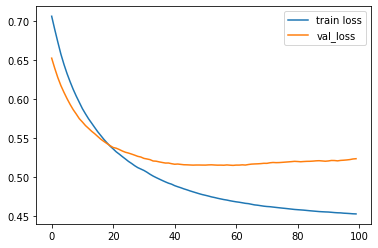

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

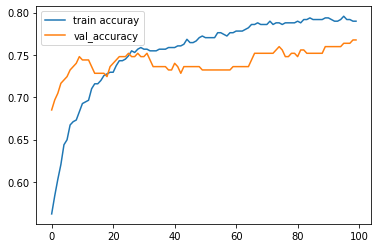

In [ ]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()